In [1]:
import numpy as np
import qutip
import pickle
import multi_stages as stages

import matplotlib.pyplot as plt

In [2]:
import multi_stages_mcsolve_config as config


states_infty_list = []
pstates_infty_list = []
for sim in config.sim_list:
    f = open(f"data/mcsolve-Ns={sim.Ns}-lambda={sim.lmbd}-Nt={sim.Nt}-T={sim.T}-dt={sim.dt}.pkl", "rb")
    data = pickle.load(f)
    f.close()

    # print(data)
    states_infty_list.append(data[1].states[:,-1])

    pstates_infty = []
    for state in data[1].states[:,-1]:
        pstate = state.ptrace(0)
        pstates_infty.append(pstate)
    pstates_infty_list.append(pstates_infty)


states_infty_list_10 = []
pstates_infty_list_10 = []
for sim in config.sim_list:
    f = open(f"data/mcsolve-Ns={sim.Ns}-lambda={sim.lmbd}-Nt={sim.Nt}-T={10}-dt={sim.dt}.pkl", "rb")
    data = pickle.load(f)
    f.close()

    # print(data)
    states_infty_list_10.append(data[1].states[:,-1])

    pstates_infty_10 = []
    for state in data[1].states[:,-1]:
        pstate = state.ptrace(0)
        pstates_infty_10.append(pstate)
    pstates_infty_list_10.append(pstates_infty_10)


f = open(f"data/gutzwiller.pkl", "rb")
t, y = pickle.load(f)
f.close()


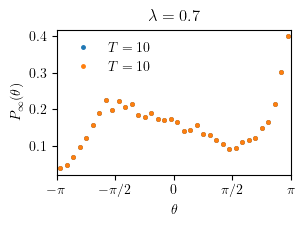

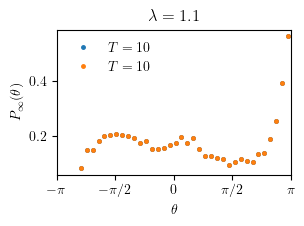

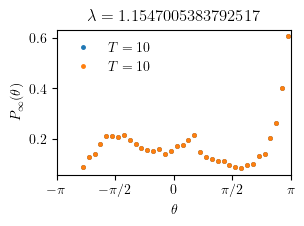

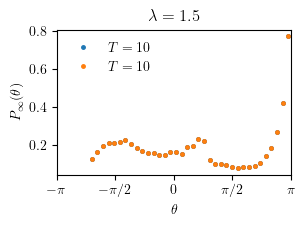

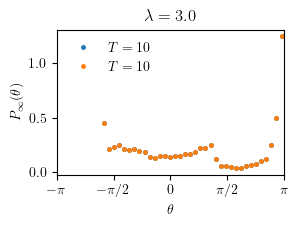

In [4]:
plt.style.use(["./config/stylelib/thesis.mplstyle"])

for sim, pstates_infty, pstates_infty_10 in zip(config.sim_list, pstates_infty_list, pstates_infty_list_10):
    plt.figure()

    thetas = []
    for pstate in pstates_infty:
        thetas.append(stages.state_to_theta(pstate))

    counts, bins = np.histogram(thetas, 36)
    bin_width = bins[1] - bins[0]
    freqs = counts / sim.Nt / bin_width

    thetas_10 = []
    for pstate in pstates_infty_10:
        thetas_10.append(stages.state_to_theta(pstate))

    counts_10, bins_10 = np.histogram(thetas_10, 36)
    bin_width_10 = bins_10[1] - bins_10[0]
    freqs_10 = counts_10 / sim.Nt / bin_width_10

    plt.plot(bins[:-1] + bin_width/2, freqs, ".", label=rf"$T = {sim.T}$")
    plt.plot(bins_10[:-1] + bin_width_10/2, freqs_10, ".", label=r"$T=10$")
    # if np.isclose(sim.lmbd, .7):
    #     plt.plot(t, y, label="Gutzwiller")
    # plt.plot(np.arange(-np.pi, np.pi, .01), stages.p_infty(sim.lmbd, np.arange(-np.pi, np.pi, .01)), label=r"Analitical")

    plt.xlim((-np.pi, np.pi))
    xticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    xlabels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
    plt.xticks(xticks, xlabels)
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$P_\infty(\theta)$")
    plt.legend(loc='upper left')
    plt.title(rf"$\lambda = {sim.lmbd}$")

    plt.tight_layout()

    # plt.savefig(f"plots/mcsolve-Ns={sim.Ns}-lambda={sim.lmbd}-Nt={sim.Nt}-T={sim.T}-dt={sim.dt}.pdf")